In [135]:


from ucimlrepo import fetch_ucirepo
import pandas as pd
import random
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import re
# fetch dataset 
energy_efficiency = fetch_ucirepo (id=242) 
  
# data (as pandas dataframes) 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  
# metadata 
#print(energy_efficiency.metadata) 
  
# variable information 
print(energy_efficiency.variables) 
x = 0
# Check if 'df' is a DataFrame
if isinstance(energy_efficiency.variables, pd.DataFrame):
#if isinstance(x, pd.DataFrame):
    print("The object 'df' is a DataFrame.")
else:
    print("The object 'df' is NOT a DataFrame.")


  name     role        type demographic                description units  \
0   X1  Feature  Continuous        None       Relative Compactness  None   
1   X2  Feature  Continuous        None               Surface Area  None   
2   X3  Feature  Continuous        None                  Wall Area  None   
3   X4  Feature  Continuous        None                  Roof Area  None   
4   X5  Feature  Continuous        None             Overall Height  None   
5   X6  Feature     Integer        None                Orientation  None   
6   X7  Feature  Continuous        None               Glazing Area  None   
7   X8  Feature     Integer        None  Glazing Area Distribution  None   
8   Y1   Target  Continuous        None               Heating Load  None   
9   Y2   Target  Continuous        None               Cooling Load  None   

  missing_values  
0             no  
1             no  
2             no  
3             no  
4             no  
5             no  
6             no  
7          

In [136]:

explanatory_var = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution"]
energy_efficiency.data.features.columns  = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution"]
categorical_variables = ["Orientation"]
numerical_variables = [var for var in explanatory_var if var not in categorical_variables]

explanatory_var = energy_efficiency.data.features.columns 


In [137]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
random_seed = 32
random.seed(random_seed)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=random_seed)



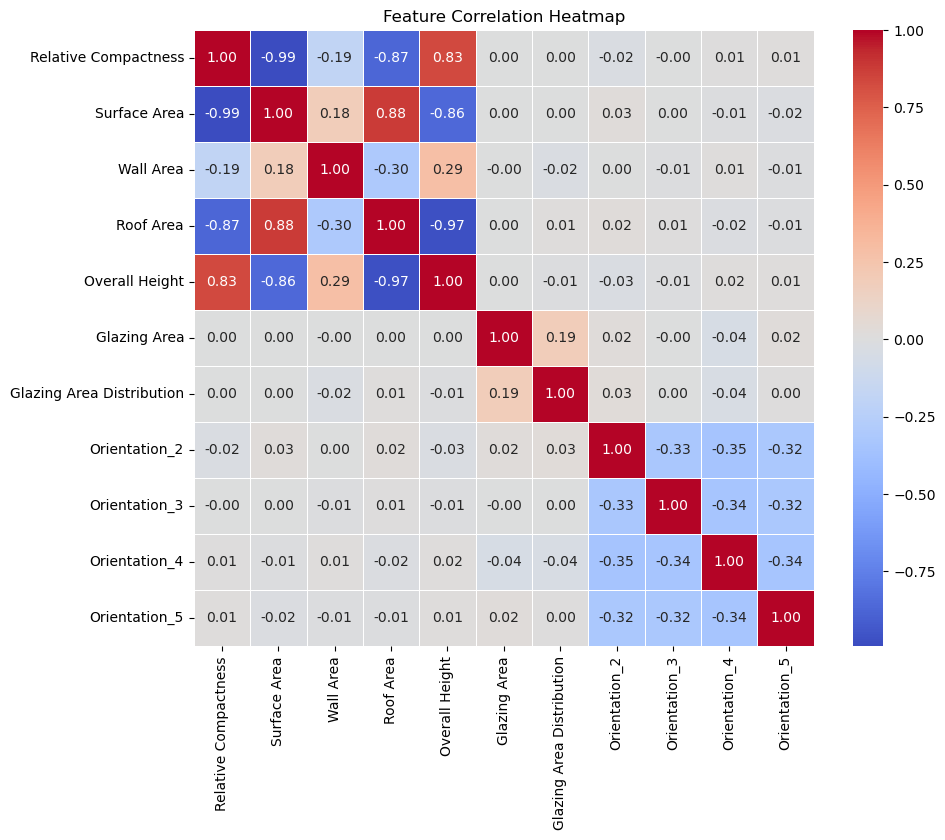

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Numerical and Categorical Pipelines
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessing_pipeline = ColumnTransformer([
    ("num_pipeline", numerical_pipeline, numerical_variables),
    ("encoder", OneHotEncoder(handle_unknown='ignore'), categorical_variables)
])

# Fit and transform the data
X_train_transformed_tmp = preprocessing_pipeline.fit_transform(X_train)

# Recreate column names
numerical_column_names = numerical_variables  # Original numerical column names
encoded_categories = preprocessing_pipeline.named_transformers_["encoder"].get_feature_names_out(categorical_variables)
all_column_names = list(numerical_column_names) + list(encoded_categories)

# Convert to DataFrame with correct column names
X_train_transformed_tmp = pd.DataFrame(X_train_transformed_tmp, columns=all_column_names)

# Compute and plot correlation matrix
correlation_matrix = X_train_transformed_tmp.corr()

plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig(Path("Assets") / Path ("Feature_Correlation_Heatmap"), dpi=200)
plt.show()

In [139]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

X_train_transformed_tmp = preprocessing_pipeline.fit_transform(X_train)

X_train_transformed_tmp = pd.DataFrame(X_train_transformed_tmp)
X_train_transformed_tmp

,0,1,2,3,4,5,6,7,8,9,10
0,1.314915,-1.252286,0.017525,-1.221918,1.013115,-1.011661,0.731772,1.0,0.0,0.0,0.0
1,-0.029081,-0.126100,2.282829,-1.221918,1.013115,-1.778053,-1.876692,0.0,0.0,1.0,0.0
2,-1.181078,1.281633,0.583851,0.960649,-0.987054,-1.011661,-0.572460,0.0,1.0,0.0,0.0
3,-0.989079,1.000086,0.017525,0.960649,-0.987054,0.137925,0.731772,0.0,1.0,0.0,0.0
4,2.082912,-1.815379,-0.548801,-1.494739,1.013115,1.287512,0.079656,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.258918,-0.407646,0.583851,-0.676276,1.013115,0.137925,0.079656,0.0,0.0,0.0,1.0
610,-1.181078,1.281633,0.583851,0.960649,-0.987054,-1.011661,-1.224576,1.0,0.0,0.0,0.0
611,-0.029081,-0.126100,2.282829,-1.221918,1.013115,0.137925,-1.224576,0.0,0.0,1.0,0.0
612,-0.221081,0.155447,-1.681453,0.960649,-0.987054,1.287512,-1.224576,0.0,0.0,0.0,1.0


In [140]:

print(X.shape)
print(y.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(768, 8)
(768, 2)
(154, 2)
(614, 8)
(614, 2)
(154, 8)
(154, 2)


In [141]:

from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

regressor_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("regressor", LinearRegression())
])

regressor_pipeline.fit(X_train, y_train)

predictions_train = regressor_pipeline.predict(X_train)
predictions_test = regressor_pipeline.predict(X_test)


print (regressor_pipeline.score(X_train, y_train))
print (regressor_pipeline.score(X_test, y_test))

regressor_pipeline.score(X_test, y_test)
print (np.sqrt(mse(y_train, predictions_train)))
print (np.sqrt(mse(y_test, predictions_test)))

print(y_train)


0.9005666177703431
0.9060883548388542
3.041742935312052
3.1158761198333655
        Y1     Y2
196  29.06  29.34
22   24.77  29.79
137  15.18  19.34
469  13.00  15.59
627  32.75  34.00
..     ...    ...
403  39.83  36.87
88   15.41  19.37
310  36.91  37.45
555  14.55  17.25
727  35.24  37.27

[614 rows x 2 columns]


In [142]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
import numpy as np


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=random_seed)

# Numerical Pipeline
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("pca", PCA())  # PCA placeholder, n_components will be tuned
])

# Preprocessing Pipeline
preprocessing_pipeline = ColumnTransformer([
    ("num_pipeline", numerical_pipeline, numerical_variables),
    ("encoder", OneHotEncoder(handle_unknown="ignore"), categorical_variables)
])

regressor_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("regressor", LinearRegression())
])
# Grid Search for PCA n_components
param_grid = {
    "preprocessing__num_pipeline__pca__n_components": [1, 3, 5]  # List of n_components to try
}

# GridSearchCV Setup
grid_search = GridSearchCV(
    estimator=regressor_pipeline,
    param_grid=param_grid,
    cv=2,  # Cross-validation folds
    scoring="r2",  # Use R^2 as the scoring metric
    verbose=1
)


In [ ]:

tests = [[X_train, y_train], [X_test, y_test]]
labels = ["Training_Set", "Test_Set"]


# Fit Grid Search
#for test_sel, label in zip(tests, labels):

grid_search.fit(tests[0][0], tests[0][1])
columns_to_keep = ['mean_test_score', 'rank_test_score', 'hyperparam_combination']
results_df = pd.DataFrame (grid_search.cv_results_)
# Evaluate on Test Data
best_mdl = grid_search.best_estimator_

results_df = results_df[['params', 'mean_test_score', 'rank_test_score']]
# Add a string representation of hyperparameter combinations for plotting
#results_df['classifier'] = results_df['params'].apply(lambda x: x['classifier'].__class__.__name__)
results_df['hyperparam_combination'] = results_df['params'].apply(
    lambda x: re.sub("classifier", "", re.sub(r"[{}()_:]", "", str(x)))
)
# Sort results by rank
results_df = results_df.sort_values(by='rank_test_score')
results_df_table = results_df[columns_to_keep]
results_df_table.to_csv("Hyperparametersresults_test_set.csv", index=False)

print("Best PCA n_components:", grid_search.best_params_)
print("Best Cross-Validation Score (R^2):", grid_search.best_score_)

for test_sel, label in zip(tests, labels):

  predictions_test = best_mdl.predict(test_sel[0])
  results_df = pd.DataFrame(grid_search.cv_results_)
  # Extract only relevant columns: hyperparameters and scores

  # Best PCA n_components and Score
  #print("Test R^2 Score:", best_pipeline.score(X_test, y_test))
  print(f"{label} RMSE: " + str(np.sqrt(mse(test_sel[1], predictions_test))))
  print(f"{label} R-Squared (R²): " + str(np.sqrt(r2_score(test_sel[1], predictions_test))))
  
#regressor_pipeline.named_steps["regressor"].coef_

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best PCA n_components: {'preprocessing__num_pipeline__pca__n_components': 5}
Best Cross-Validation Score (R^2): 0.8945108948591403
Training_Set RMSE: 3.06720807305084
Training_Set R-Squared (R²): 0.948097644821619
Test_Set RMSE: 3.1579557630342237
Test_Set R-Squared (R²): 0.9505546193095694
